In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
diabetes=pd.read_csv('health care diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes.shape

(768, 9)

# Project Task:Week 1.Data Cleaning(Finding & Handling Missing Values)

In [4]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabetes.isnull().sum()

#Value of zero does not make sense and thus indicates missing value:For few variables like Glucose,BP,ST,Insuline,BMI.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
#Few variables contains zero,it means it is missing value,so replaced all missing values(0) to nan.
diabetes.loc[diabetes['Glucose']==0,'Glucose']=np.nan
diabetes.loc[diabetes['BloodPressure']==0,'BloodPressure']=np.nan
diabetes.loc[diabetes['SkinThickness']==0,'SkinThickness']=np.nan
diabetes.loc[diabetes['Insulin']==0,'Insulin']=np.nan
diabetes.loc[diabetes['BMI']==0,'BMI']=np.nan
diabetes.isnull().sum()

#Now we have missing values count.


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [9]:
#Finding missing value %
missing_value_per = (diabetes.isnull().sum()*100)/len(diabetes)
missing_value_per

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [10]:
Mode=diabetes['Insulin'].mode()
Median=diabetes['Insulin'].median()
display(Mode,Median)

0    105.0
dtype: float64

125.0

# Observations or Findings

* Handling or Treating the missing Values:-

Just because "Glucose=0.65%","Skin Thickness= 30% ","Blood pressure=5%" having the low missing value % we can fill with mean respectivly.

But "Insuline" having more approxy 50% of missing values ,we can drop this ,but because the insuline level is most important feature for diabetes detection i explored more analysis for Insuline is

1.Min=14

2.Max=846

3.mean=155.55

4.mode=105

5.median=125

6.more than insuline >200.count=85

7.Insuline count in between 155 to 200 =66

so i decided to fill Insuline missing values with mean 155.

In [11]:
#Filled missing values
diabetes['Glucose'].fillna(value=diabetes['Glucose'].mean(),inplace=True)
diabetes['BloodPressure'].fillna(value=diabetes['BloodPressure'].mean(),inplace=True)
diabetes['SkinThickness'].fillna(value=diabetes['SkinThickness'].mean(),inplace=True)
diabetes['Insulin'].fillna(value=diabetes['Insulin'].mean(),inplace=True)
diabetes['BMI'].fillna(value=diabetes['BMI'].mean(),inplace=True)
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# 2.Creating Histogram for few variables

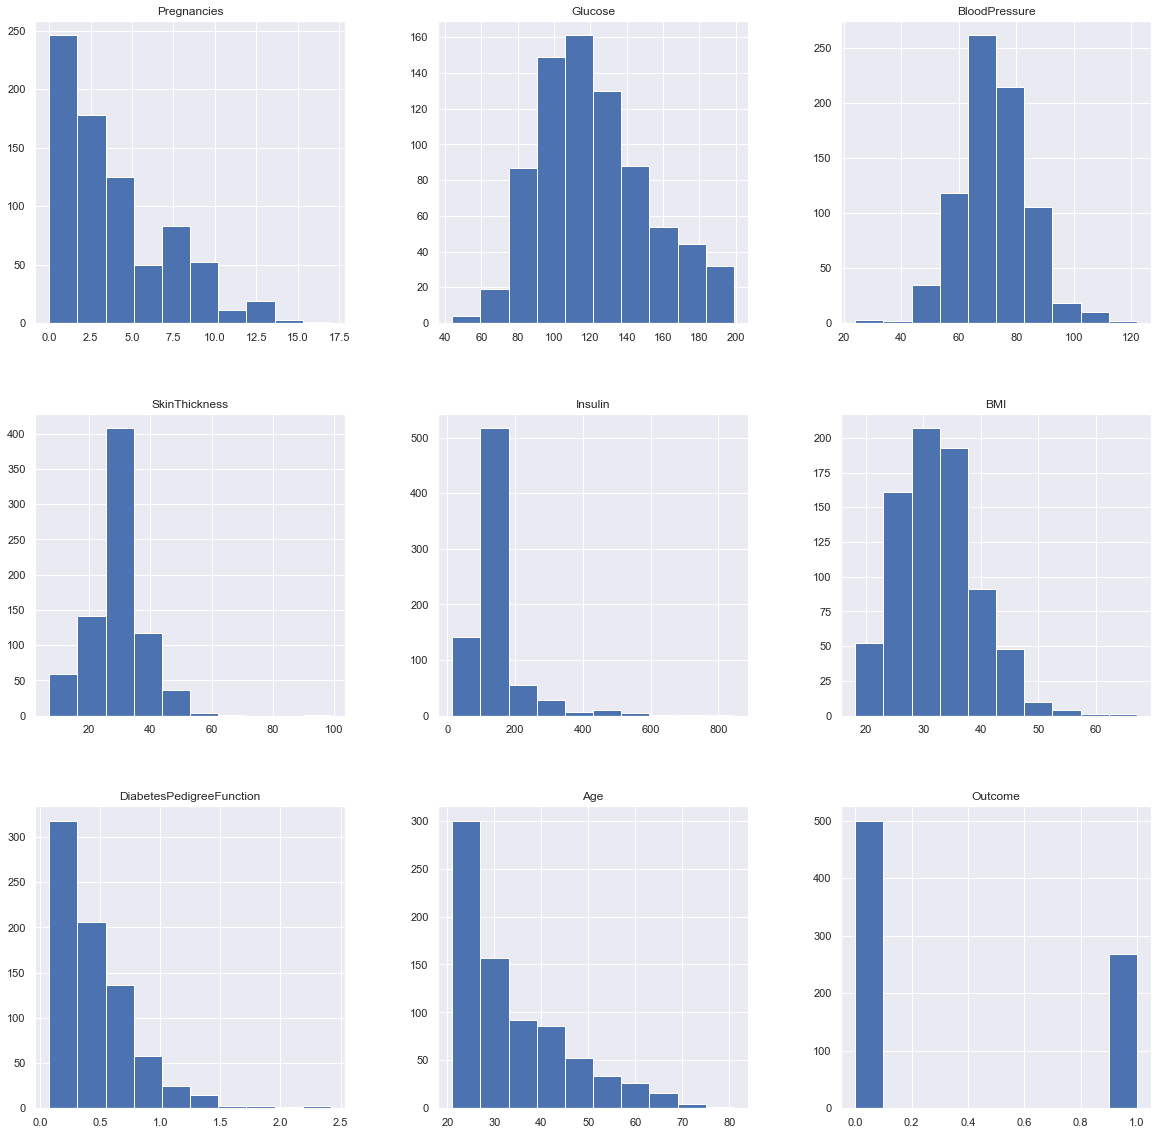

In [12]:
p = diabetes.hist(figsize = (20,20))

C:\Users\anura\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Glucose Hist')

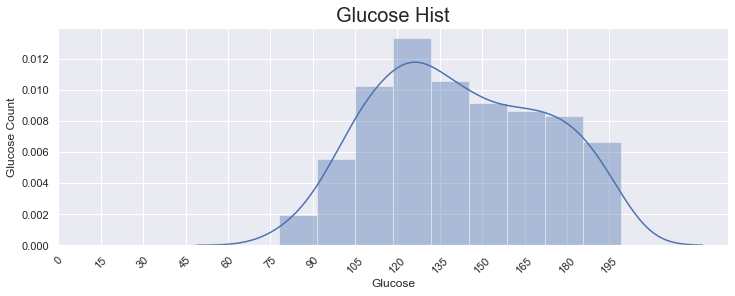

In [13]:
fig=plt.figure(figsize=(12,4))

sns.distplot(diabetes['Glucose'][diabetes['Outcome']==1])
plt.xticks([i for i in range(0,201,15)],rotation=45)
plt.ylabel('Glucose Count')
plt.title('Glucose Hist',fontsize=20)

C:\Users\anura\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'BloodPressure  Hist')

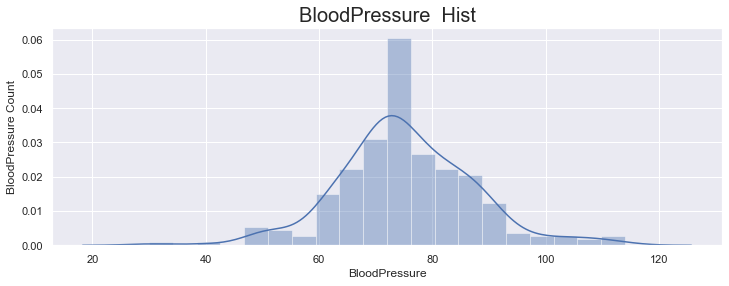

In [14]:
fig=plt.figure(figsize=(12,4))

sns.distplot(diabetes['BloodPressure'][diabetes['Outcome']==1])
plt.xticks()
plt.ylabel('BloodPressure Count')
plt.title('BloodPressure  Hist',fontsize=20)

C:\Users\anura\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Insulin  Hist')

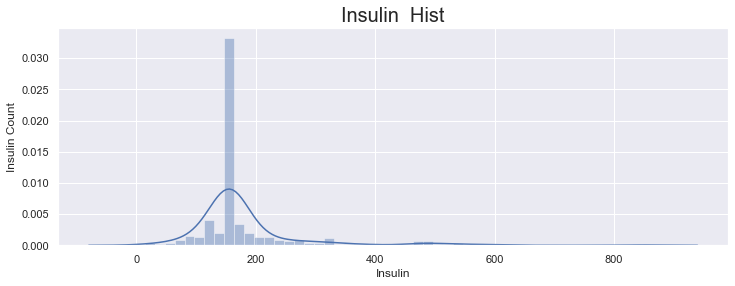

In [15]:
fig=plt.figure(figsize=(12,4))

sns.distplot(diabetes['Insulin'][diabetes['Outcome']==1])
plt.xticks()
plt.ylabel('Insulin Count')
plt.title('Insulin  Hist',fontsize=20)

C:\Users\anura\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'BMI  Hist')

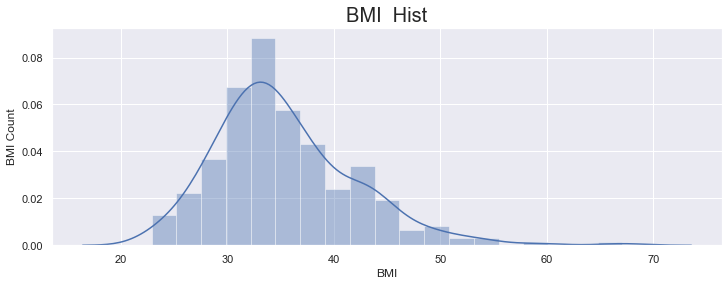

In [16]:
fig=plt.figure(figsize=(12,4))

sns.distplot(diabetes['BMI'][diabetes['Outcome']==1])
plt.xticks()
plt.ylabel('BMI Count')
plt.title('BMI  Hist',fontsize=20)

C:\Users\anura\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'DiabetesPedigreeFunction   Hist')

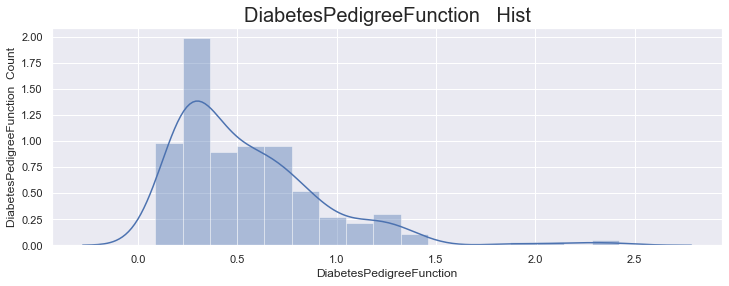

In [17]:
fig=plt.figure(figsize=(12,4))

sns.distplot(diabetes['DiabetesPedigreeFunction'][diabetes['Outcome']==1])
plt.xticks()
plt.ylabel('DiabetesPedigreeFunction  Count')
plt.title('DiabetesPedigreeFunction   Hist',fontsize=20)

# 3.Create a count (frequency) plot describing the count of variables. 

In [18]:
diabetes.dtypes.value_counts()

float64    6
int64      3
dtype: int64

<AxesSubplot:title={'center':'Countplot of Data Types & Variables'}, ylabel='count'>

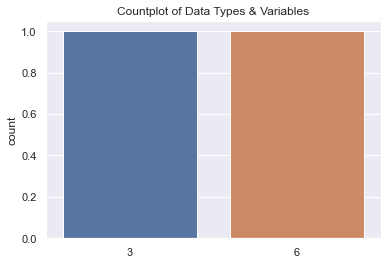

In [19]:
plt.title('Countplot of Data Types & Variables')
sns.countplot(x=diabetes.dtypes.value_counts(),data=diabetes)


# Project Task: Week 2 : 1.Data Exploration:

In [20]:
#Check the balance of the data by plotting the count of outcomes by their value.
#Describe your findings and plan future course of action.

diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

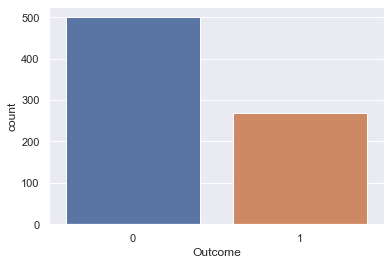

In [21]:
sns.countplot(x='Outcome',data=diabetes)


# Observations or Findings

By this we know that,dataset is imbalanced,because

Outcome 1= No.patients having Diabetes=268 records available,
Outcome 0= No.patients Not having Diabetes=500 records available

so our both 0 and 1 catagories records are not equally distributes.which will give "Biased result".

To overcome with this Imbalacing of dataset we have few techniques

1.Undersampling of Mejority Class(Outcome-0)---But if we use this method most of the data will be waste so this is not the best approch, we want to utilise full data without loosing information.

2.Oversampling Minority Class (0) by duplicate--this we can do.

3.Ensembled Method---this one will be the best method according to me.
in this we will devide subsets and take mejority vote.

# 2 & 3.Scatter charts between the pair of variables to know the relationship

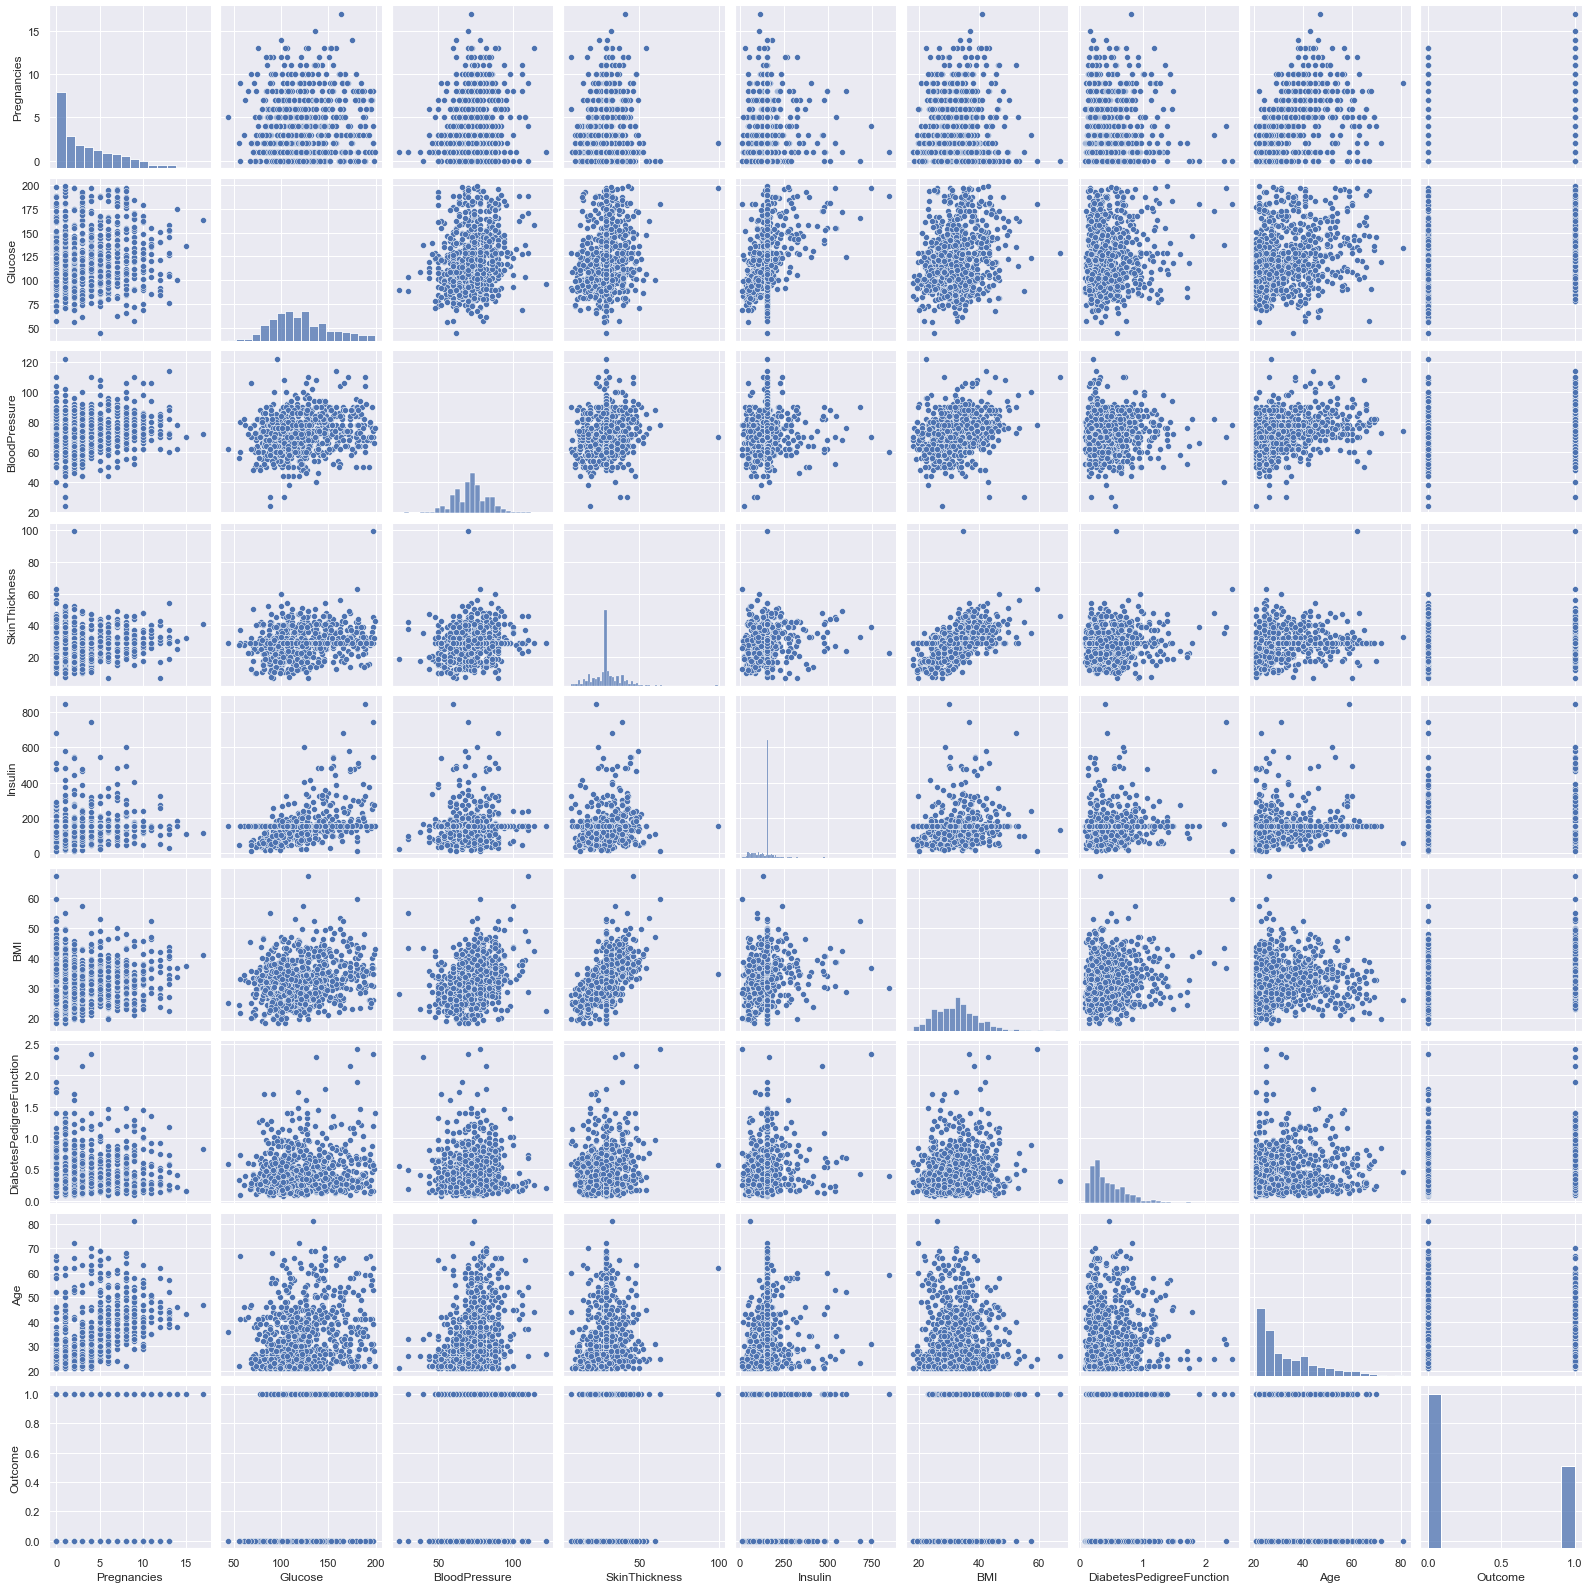

In [22]:
sns.pairplot(diabetes)

The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

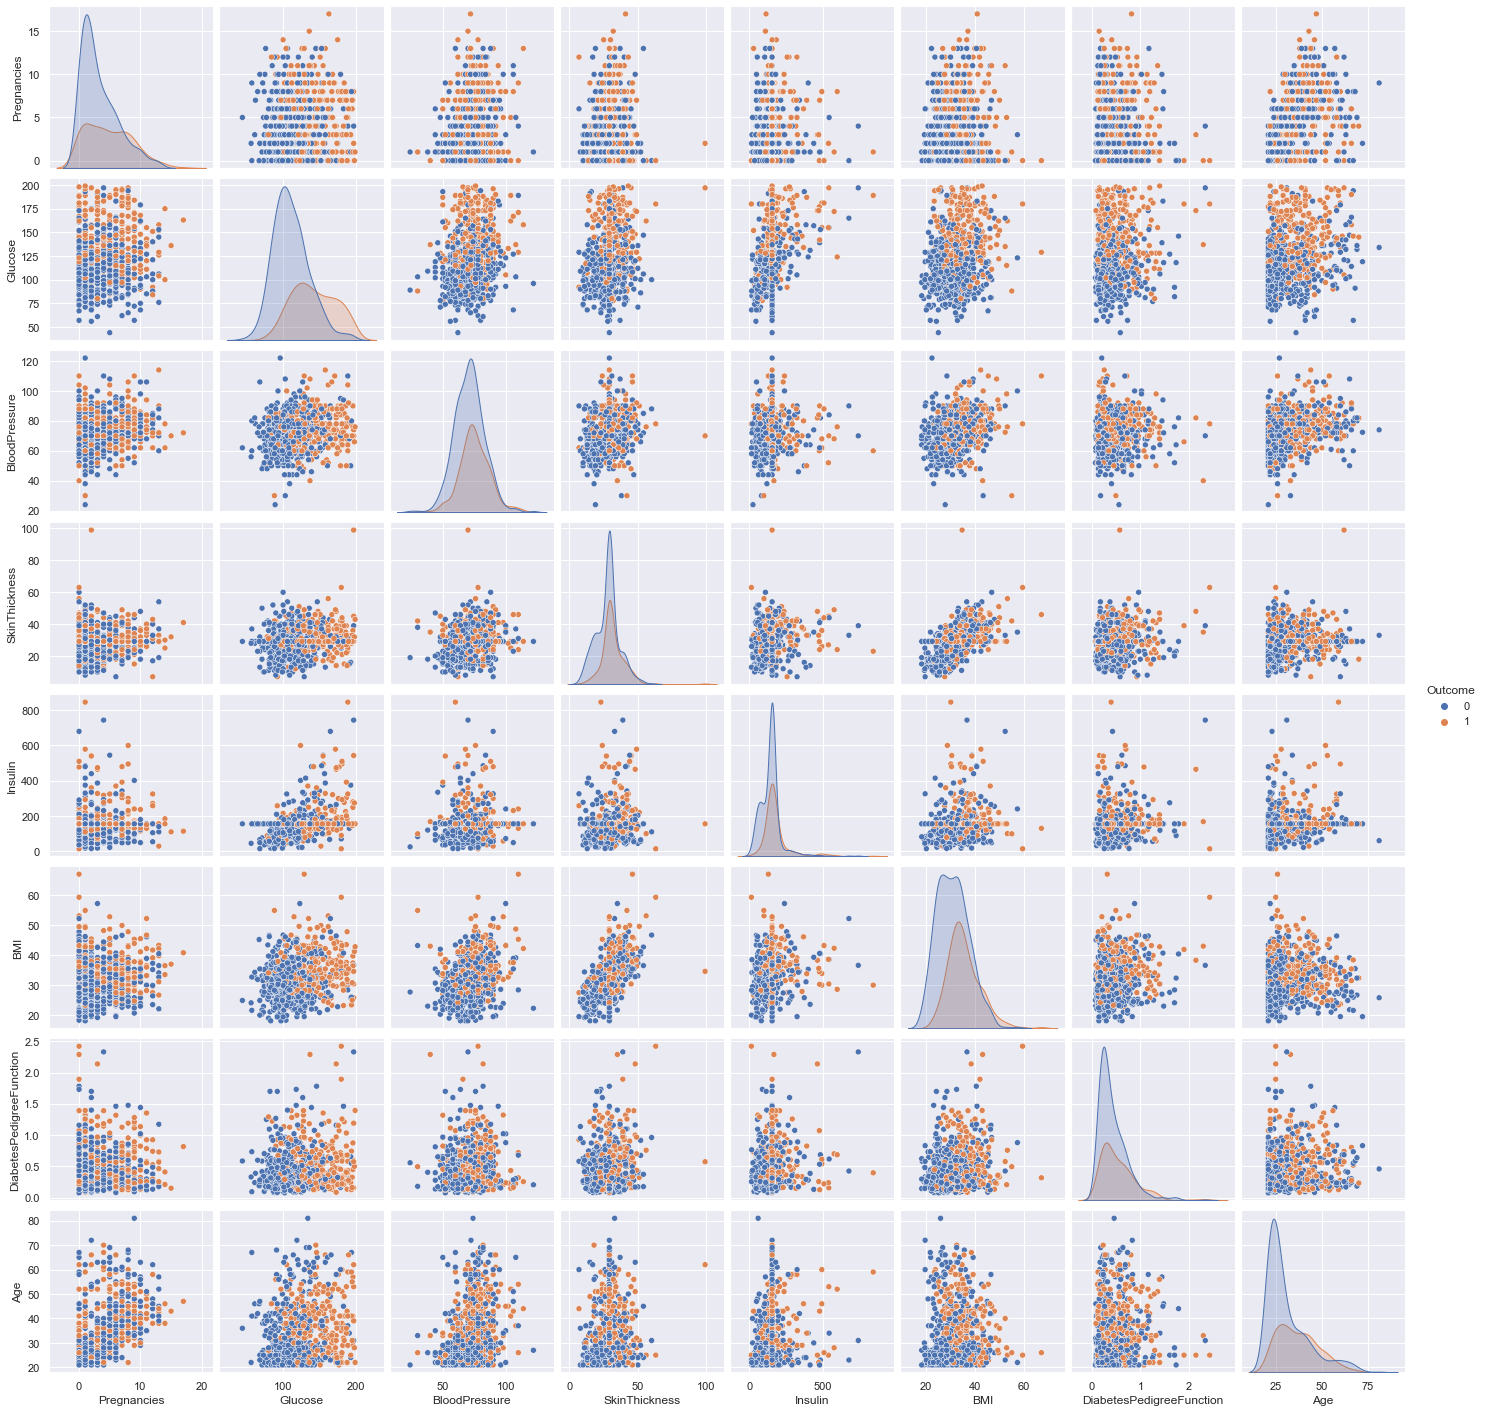

In [23]:
#Pair plot to know relationship between two variables
sns.pairplot(diabetes,hue='Outcome')

In [24]:
corr_matrix=diabetes.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


<AxesSubplot:>

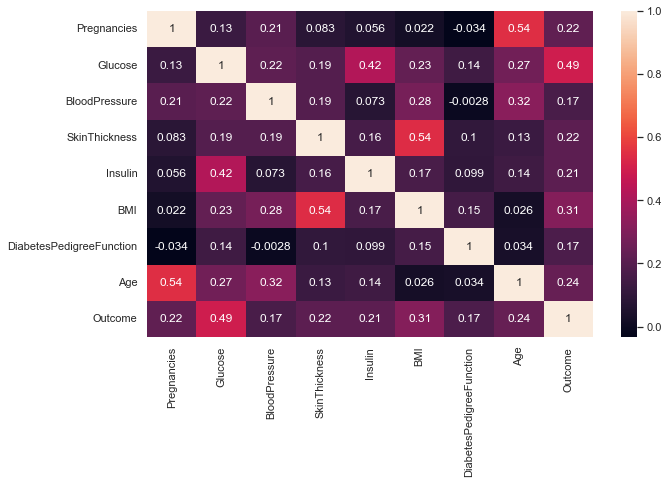

In [25]:
plt.figure(figsize=(10,6))

sns.heatmap(corr_matrix,annot=True)

# Observations or Findings

From the Correlation heatmap & Correlation Matrix we can see that there is strong correlation
between "Outcome" and [Glucose,Insulin,BMI,Age] ,so we can select these feature to accept input from the user and predict the 
Outcome

The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

This Correlation _matrix shows,there is 24% contribution of "Age" for the outcome,similarly Glucose level contributing highest  for outcome i.e 47%.

Conclusion-If the glucose level is high then 47% chance of diabetes.

# Project Task: Week 3 :1.Data Modeling:

In [26]:
#Feature Scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
scaled_dataset=sc.fit_transform(diabetes)



In [27]:
scaled_dataset=pd.DataFrame(scaled_dataset)
scaled_dataset.columns=diabetes.columns
scaled_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.170130,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.170130,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.240798,0.170130,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0


In [28]:
#Creating X and y
x=scaled_dataset.drop('Outcome',axis=1)
y=scaled_dataset.Outcome

In [29]:
#Splitting X & Y
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.20, random_state=42, stratify=diabetes['Outcome'])
    

In [30]:
#Checking Dimensions
print('xtrain_shape:',xtrain.shape)
print('xtest_shape:',xtest.shape)
print('ytrain_shape:',ytrain.shape)
print('ytest_shape:',ytest.shape)


xtrain_shape: (614, 8)
xtest_shape: (154, 8)
ytrain_shape: (614,)
ytest_shape: (154,)


In [31]:
# 1. Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=42)
lr.fit(xtrain,ytrain)


LogisticRegression(random_state=42)

C:\Users\anura\AppData\Local\Temp/ipykernel_8488/3848645081.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  acc=pd.Series()


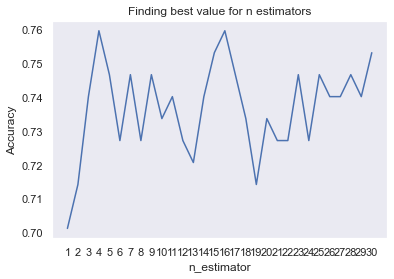

In [32]:
#plotting a graph for n_neighbours
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

xaxis =list(range(1,31))
acc=pd.Series()
x=range(1,31)

for i in list(range(1,31)):
    knn_model=KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(xtrain,ytrain)
    prediction=knn_model.predict(xtest)
    acc=acc.append(pd.Series(metrics.accuracy_score(prediction,ytest)))
    
plt.plot(xaxis,acc)
plt.xticks(x)
plt.title("Finding best value for n estimators")
plt.xlabel("n_estimator")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

Best Score is 76% for k=4 & 16 estimators


In [44]:
knn =KNeighborsClassifier(4)

knn.fit(xtrain,ytrain)
knn.score(xtest,ytest)

0.7597402597402597

In [47]:
#Using support verctor machine
from sklearn.svm import SVC
svc=SVC(kernel='linear',random_state=42)
svc.fit(xtrain,ytrain)

SVC(kernel='linear', random_state=42)

In [50]:
#DEcision tree alsogorithm
from sklearn.tree import DecisionTreeClassifier
dectree=DecisionTreeClassifier()
dectree.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [59]:
#Making Prediction
y_predict_logistic=lr.predict(xtest)
y_predict_knn=knn.predict(xtest)
y_predict_svm=svc.predict(xtest)
y_predict_decisiontree=dectree.predict(xtest)

In [60]:
#accuracy evaluation
from sklearn.metrics import accuracy_score
accuracy_logistic=accuracy_score(ytest,y_predict_logistic)
accuracy_knn=accuracy_score(ytest,y_predict_knn)
accuracy_svm=accuracy_score(ytest,y_predict_svm)
accuracy_dectree=accuracy_score(ytest,y_predict_decisiontree)

In [62]:
#accuracy test
print("Logistic Regression :", round(accuracy_logistic*100))
print("K Neraest Neighbors :",round(accuracy_knn*100))
print("Support Vector Classifier :",round(accuracy_svm*100))
print("Decision Tree Classifier :",round(accuracy_dectree *100))

Logistic Regression : 71
K Neraest Neighbors : 76
Support Vector Classifier : 70
Decision Tree Classifier : 68


# Observations

As compared with few algorithm we got highest accuracy as "76%"

to increase the more accuracy we also need to follow few methods in preprocessing.

1.Ensembled method or Oversampling minority class required to use to get rid from imbalanced dataset.


In [66]:
#Confusion Matrix for KNN Algorithm
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,y_predict_knn)
pd.crosstab(ytest, y_predict_knn, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0.0,91,9,100
1.0,28,26,54
All,119,35,154


Text(0.5, 12.5, 'Predicted label')

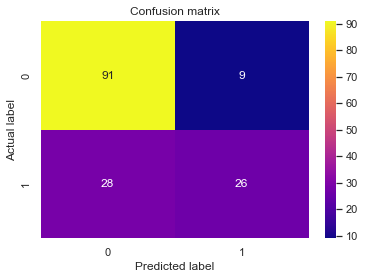

In [72]:
#Confusion Matrix Heatmap for KNN algorithm
from sklearn import metrics
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="plasma" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [73]:
#Classification report for KNN algorithm
from sklearn.metrics import classification_report
print(classification_report(ytest,y_predict_knn))

              precision    recall  f1-score   support

         0.0       0.76      0.91      0.83       100
         1.0       0.74      0.48      0.58        54

    accuracy                           0.76       154
   macro avg       0.75      0.70      0.71       154
weighted avg       0.76      0.76      0.74       154



# Project Task: Week 4 :Data Modeling: ROC AUC

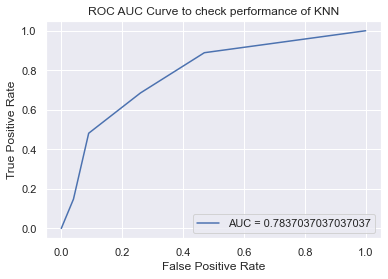

In [81]:
#define metrics for ROC AUC Curve
from sklearn.metrics import roc_curve
y_predict_proba=knn.predict_proba(xtest)[ : : ,1]
fpr, tpr, thresholds = roc_curve(ytest, y_predict_proba)
auc = metrics.roc_auc_score(ytest, y_predict_proba)

 
#Create ROC Curve
plt.plot(fpr,tpr,label="AUC = "+str(auc))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC AUC Curve to check performance of KNN")
plt.legend(loc=4)
plt.show()

# Observations

ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things (e.g If a patient has a disease or no). 

It is an graphical representation of model performance.so AUC(Area under the curve) must required as high as possible.

AUC ROC useful when model is binary classification problem(which have only 2 possible outcomes or 2 classes)

Better models can accurately distinguish between the two. Whereas, a poor model will have difficulties in distinguishing between the two

in our case AUC Score is-78% ,for good model AUC must required more than 95%

.

# **--------000-----------0000----Thank You----0000--------------000---------**